## value prediction

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing['No'].value_counts()

No
1      1
273    1
283    1
282    1
281    1
      ..
136    1
135    1
134    1
133    1
414    1
Name: count, Length: 414, dtype: int64

In [6]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
# %matplotlib inline

In [8]:
# import matplotlib.pyplot as plt

In [9]:
# housing.hist(bins=50,figsize=(20,15))

## training-testing

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)* test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set=split_train_test(housing,0.2)

[358 350 373 399 369  72 262 140  93  70 118 131 336  55 126 376  56 291
 365  84 116   9 374 137 320 402 231  90  94 173  30 141 104  79  33 290
 286 409 222 361  15 311   0 317 272 124 271 184 275 360 225 355 364 274
 175  73  42 165  77  39 401  25 155 180 347 266  22  46  78 152  82  76
  57 110  24  17 238 405  31 283 157 203 208 192 234   5  45 245 346 195
 382 400 296   3  18 250  60 390 408  63 261 297 113 248 326 410 391 352
 132 237 108 101 193  29 307 386 305 114 247  75 268 148  16  66 341   7
 194  19 176 367 304 198 145 265 109 202 196 396 239  83 168 323  74 383
 119 209 219 153 177 387 371  36 139 338 172 211 332  59 111 284 325   6
 299 285 158 150  10 331 103  81 278 258 167 388 223 229 181 227  89 389
 163 147 246  92  69 123  96 143 362  97 249  68  23  37 144 122 228 182
  67 340 244 394 384 329 210 125 146 289  86 412 220 349 327 356 314 183
 218 294 333 392 129  38  11 280 185 281 112 179 301 366 337 117 381 287
 398 298 233 375 255 164 354 136 154 199 197 406   

In [12]:
print(f"Rows in train set {len(train_set)}\n Rows in test set {len(test_set)}")

Rows in train set 332
 Rows in test set 82


In [13]:
# from sklearn.model_selection import split_train_test
# train_set,test_set=split_train_test(housing,test_size=0.2,random_state=42)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [16]:
print(f"Rows in train set {len(train_set)}\n Rows in test set {len(test_set)}")

Rows in train set 331
 Rows in test set 83


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['X1 transaction date']):
    start_test_state=housing.loc[test_index]
    start_train_state=housing.loc[train_index]

In [18]:
start_test_state['X1 transaction date'].value_counts()

X1 transaction date
2013.417    12
2013.083     9
2013.500     9
2012.917     8
2013.333     6
2012.833     6
2013.000     6
2013.250     6
2012.667     6
2012.750     5
2013.167     5
2013.583     5
Name: count, dtype: int64

In [19]:
housing=start_test_state.copy()

In [20]:
housing.shape

(83, 8)

## correlation

In [21]:
corr_matrix=housing.corr()

In [22]:
corr_matrix['X1 transaction date'].sort_values(ascending=False)

X1 transaction date                       1.000000
Y house price of unit area                0.061052
X3 distance to the nearest MRT station    0.013125
X2 house age                             -0.008826
X4 number of convenience stores          -0.042413
X6 longitude                             -0.058736
X5 latitude                              -0.083855
No                                       -0.143764
Name: X1 transaction date, dtype: float64

array([[<Axes: xlabel='No', ylabel='No'>,
        <Axes: xlabel='X6 longitude', ylabel='No'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='No'>,
        <Axes: xlabel='X2 house age', ylabel='No'>],
       [<Axes: xlabel='No', ylabel='X6 longitude'>,
        <Axes: xlabel='X6 longitude', ylabel='X6 longitude'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X6 longitude'>,
        <Axes: xlabel='X2 house age', ylabel='X6 longitude'>],
       [<Axes: xlabel='No', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X6 longitude', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X2 house age', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='No', ylabel='X2 house age'>,
        <Axes: xlabel='X6 longitude', ylabel='X2 house age'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X2 house ag

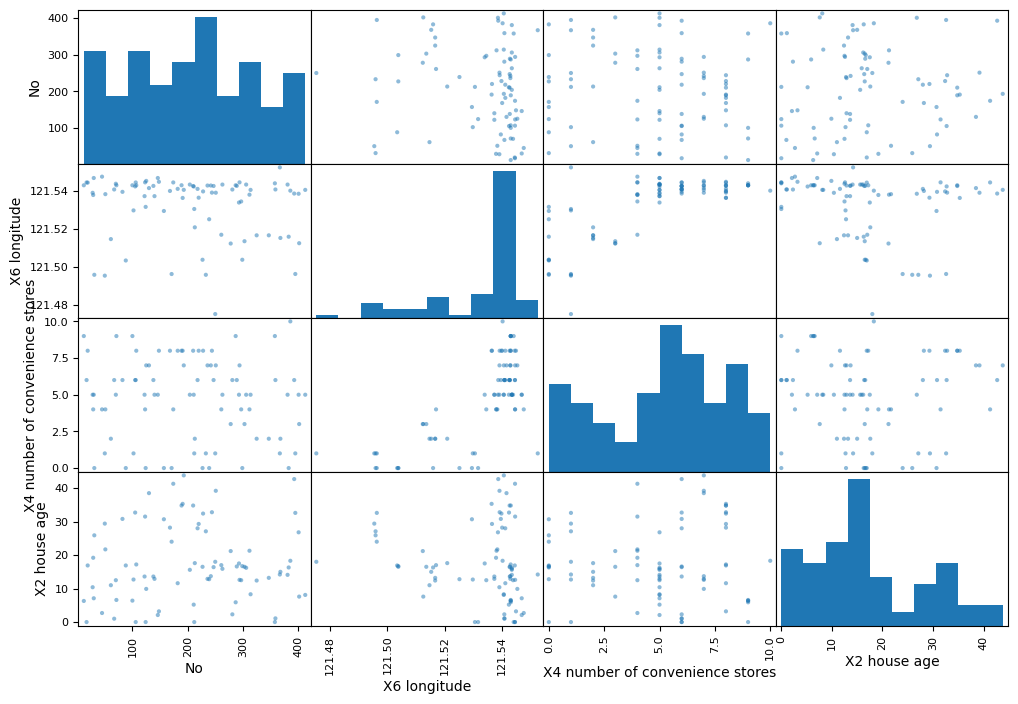

In [23]:
from pandas.plotting import scatter_matrix
attribute=["No","X6 longitude","X4 number of convenience stores","X2 house age"]
# scatter_matrix()
scatter_matrix(housing[attribute], figsize = (12,8))

<Axes: xlabel='X6 longitude', ylabel='X4 number of convenience stores'>

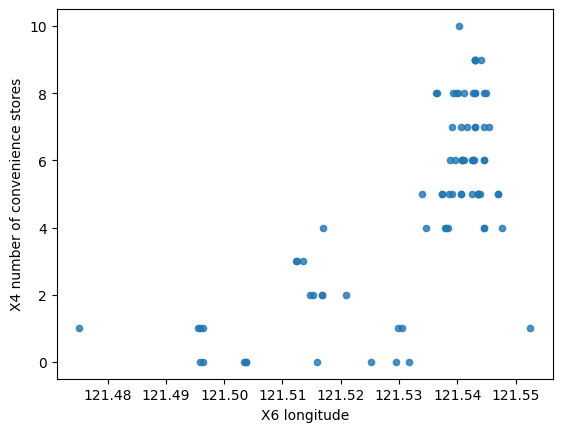

In [24]:
housing.plot(kind="scatter",x="X6 longitude",y="X4 number of convenience stores",alpha=0.8)

In [25]:
housing["X1X3"]=housing["X1 transaction date"]/housing["X3 distance to the nearest MRT station"]

In [26]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1X3
170,171,2013.333,24.0,4527.6870,0,24.94741,121.49628,14.4,0.444671
238,239,2013.083,12.8,732.8528,0,24.97668,121.52518,40.6,2.746913
296,297,2012.750,12.5,1144.4360,4,24.99176,121.53456,34.1,1.758727
249,250,2012.833,18.0,6306.1530,1,24.95743,121.47516,15.0,0.319186
311,312,2013.167,21.3,537.7971,4,24.97425,121.53814,42.2,3.743358


In [27]:
housing=start_train_state.drop("X1 transaction date",axis=1)
housing_labels=start_train_state["X1 transaction date"].copy()

## missing attributes

In [28]:
# three steps to manage missing three attribute
# 1.Get rid of the missing data points
# 2.Get rid of the whole attribute
# 3.Set the value to some value(0,mean or median)

In [29]:
housing.shape

(331, 7)

In [30]:
# a=housing.dropna(subset=["X1 transaction date"]) #option 1
# a.shape

In [31]:
# housing.drop("X1 transaction date",axis=1).shape #option 2

In [32]:
# median=housing["X1 transaction date"].median()
# housing["X1 transaction date"] #option 3

In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_.shape

(7,)

In [35]:
X=imputer.transform(housing)

In [36]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [37]:
housing_tr.describe()

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,207.773414,17.810876,1098.354193,3.921450,24.968961,121.533457,37.591843
std,121.311495,11.426132,1228.384528,2.960322,0.012553,0.015181,13.727481
min,1.000000,0.000000,23.382840,0.000000,24.932930,121.473530,7.600000
25%,100.000000,8.950000,292.997800,1.000000,24.962990,121.527600,27.000000
50%,205.000000,16.100000,535.527000,4.000000,24.971100,121.537880,37.800000
75%,317.500000,29.200000,1455.798000,6.000000,24.977705,121.543480,46.300000
max,414.000000,41.400000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Feature scaling

Primarily,two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
2. Standardization
    (value - mean)/std
    Sklearn provides a class called standard Scaler for this

## SCikit-learn Design

Primarily, three types of objects
1. Estimators-It estimates some parameter based on a dataset .Eg-imputer It has a fit method and transform method . fit method -Fits the dataset and calculate internal parameters
2. Transformers - transform method take input and returns output based on the learnings from fit(). It also has a convience function called fit_transform() which fit and then transform.
3. Predictors-LinearRegression model is an example of predictor.fit() and predict() are two common functions. It also gives score() function which will evaluate the prediction.


## Creating pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])


In [39]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [40]:
housing_num_tr

array([[-1.50892654,  1.90984256, -0.50358142, ...,  0.36450366,
         0.3557868 ,  0.08814336],
       [ 1.52092352, -1.01770707,  0.68599747, ..., -1.38907548,
         1.34665405, -0.45903316],
       [ 0.58802691, -1.56114442, -0.72559617, ..., -1.01969097,
         0.32873916,  0.46751908],
       ...,
       [-1.12090759,  1.55047269, -0.37309809, ...,  0.53204307,
         0.24363804,  0.2340571 ],
       [ 0.97604585,  1.646889  , -0.4969598 , ...,  0.094845  ,
         0.75754323,  0.03707355],
       [ 0.15047363, -1.46472812, -0.73766764, ..., -0.25938118,
         0.49036531,  0.83230343]])

## selecting a desired model for Dragon real Estate

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
# model=LinearRegression()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [42]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [43]:
prepared_data=my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([2013.00088, 2013.50065, 2012.84   , 2013.42083, 2013.22502])

In [45]:
list(some_labels)

[2013.0, 2013.583, 2012.75, 2013.5, 2013.25]

## Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [47]:
lin_mse

0.0104445912573576

## Using better evaluation technique -cross validation

In [48]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [49]:
# rmse

In [50]:
rmse_scores

array([0.21546052, 0.21507065, 0.32388656, 0.28562679, 0.30994414,
       0.27420108, 0.29645602, 0.29357889, 0.26745724, 0.27090544])

In [51]:
def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard deviation : ",scores.std)

In [52]:
print_scores(rmse_scores)

Scores :  [0.21546052 0.21507065 0.32388656 0.28562679 0.30994414 0.27420108
 0.29645602 0.29357889 0.26745724 0.27090544]
Mean :  0.27525873308362436
Standard deviation :  <built-in method std of numpy.ndarray object at 0x00000298843D0E10>


## Saving the model

In [53]:
from joblib import dump, load
dump(model, 'dragon.joblib') 

['dragon.joblib']

## Testing the model

In [54]:
X_test=start_test_state.drop("X1 transaction date",axis=1)
Y_test=start_test_state["X1 transaction date"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [55]:
final_rmse

0.30707286517065857

In [56]:
print(final_predictions,list(Y_test))

[2013.05595 2013.14018 2013.32179 2013.30578 2013.07008 2013.21832
 2012.77335 2012.93236 2013.19837 2013.02168 2013.11005 2013.18336
 2013.41516 2012.90943 2013.25164 2013.07014 2013.24588 2013.35173
 2012.99748 2013.02675 2013.09255 2013.14585 2012.99088 2013.24749
 2013.27663 2013.25758 2013.20093 2013.19825 2013.28495 2013.14329
 2013.24754 2013.09337 2013.23664 2013.16336 2013.11816 2013.19349
 2013.01583 2013.28006 2013.26329 2013.14089 2013.28839 2013.30844
 2013.22843 2013.21661 2013.19844 2013.1975  2013.18662 2012.96347
 2012.93585 2013.44746 2013.06924 2013.14418 2013.255   2013.24179
 2013.3317  2013.14914 2013.20997 2013.26083 2013.10009 2013.04996
 2013.30592 2013.32743 2013.31171 2013.33078 2013.11914 2013.17253
 2013.2743  2013.15414 2013.27088 2013.05507 2013.20254 2013.24091
 2013.12263 2013.15337 2013.34587 2013.19084 2013.14918 2013.04841
 2013.28001 2013.18091 2013.08836 2013.29335 2013.20491] [2013.333, 2013.083, 2012.75, 2012.833, 2013.167, 2012.75, 2013.417, 201

In [57]:
prepared_data[0]

array([-1.50892654,  1.90984256, -0.50358142,  0.02657439,  0.36450366,
        0.3557868 ,  0.08814336])

## model checking

In [58]:
features=np.array([[-75634.50892654,  7.90984256, -0.50358142,  0.02657439,  459.36450366,
        0.3557868 ,  78963.08814336]])
model=load('dragon.joblib')
model.predict(features)

array([2013.27656])